In [70]:
from pycaret.classification import *  # ถ้าเป็น Classification
from pycaret.time_series import *
import pandas as pd

df = pd.read_csv("data_eng_day.csv")  # อ่านไฟล์ CSV
print(df.head(10))

print(df.index)  # เช็คว่า timestamp เป็น index หรือไม่
print(df.index.dtype) 



   Unnamed: 0            timestamp      timezone   humidity      pm_10  \
0           0  2023-04-01 07:00:00  Asia/Bangkok  73.861694   4.727273   
1           1  2023-04-03 07:00:00  Asia/Bangkok  67.872493  16.046366   
2           2  2023-04-04 07:00:00  Asia/Bangkok  62.995952  13.300139   
3           3  2023-04-05 07:00:00  Asia/Bangkok  59.482051  11.864336   
4           4  2023-04-06 07:00:00  Asia/Bangkok  66.493574  16.405837   
5           5  2023-04-07 07:00:00  Asia/Bangkok  67.057330  14.291086   
6           6  2023-04-08 07:00:00  Asia/Bangkok  60.815370  19.955634   
7           7  2023-04-09 07:00:00  Asia/Bangkok  60.191329   6.298810   
8           8  2023-04-10 07:00:00  Asia/Bangkok  60.216410   8.566852   
9           9  2023-04-11 07:00:00  Asia/Bangkok  60.272756  26.641614   

      pm_2_5  pm_2_5_sp  temperature  
0   4.727273   4.727273    30.189449  
1  14.585213  14.699248    29.895143  
2  11.938022  11.942897    33.853401  
3  10.733566  10.733566    35

In [71]:
# df = pd.read_csv("data_eng_day.csv")
df = pd.read_csv("data_eng_day.csv", parse_dates=["timestamp"], index_col="timestamp")  # อ่านไฟล์ CSV
df.head(10)
print(df.index)  # เช็คว่า timestamp เป็น index หรือไม่
print(df.index.dtype) 


DatetimeIndex(['2023-04-01 07:00:00', '2023-04-03 07:00:00',
               '2023-04-04 07:00:00', '2023-04-05 07:00:00',
               '2023-04-06 07:00:00', '2023-04-07 07:00:00',
               '2023-04-08 07:00:00', '2023-04-09 07:00:00',
               '2023-04-10 07:00:00', '2023-04-11 07:00:00',
               ...
               '2025-02-03 07:00:00', '2025-02-04 07:00:00',
               '2025-02-05 07:00:00', '2025-02-06 07:00:00',
               '2025-02-07 07:00:00', '2025-02-08 07:00:00',
               '2025-02-09 07:00:00', '2025-02-10 07:00:00',
               '2025-02-11 07:00:00', '2025-02-11 11:15:42'],
              dtype='datetime64[ns]', name='timestamp', length=663, freq=None)
datetime64[ns]


In [72]:
df.index = df.index.normalize()
print(df.index)
df.index.dtype

DatetimeIndex(['2023-04-01', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
               '2023-04-10', '2023-04-11',
               ...
               '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06',
               '2025-02-07', '2025-02-08', '2025-02-09', '2025-02-10',
               '2025-02-11', '2025-02-11'],
              dtype='datetime64[ns]', name='timestamp', length=663, freq=None)


dtype('<M8[ns]')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 663 entries, 2023-04-01 to 2025-02-11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   663 non-null    int64  
 1   timezone     663 non-null    object 
 2   humidity     663 non-null    float64
 3   pm_10        663 non-null    float64
 4   pm_2_5       663 non-null    float64
 5   pm_2_5_sp    663 non-null    float64
 6   temperature  663 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [74]:
df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 663 entries, 2023-04-01 to 2025-02-11
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timezone     663 non-null    object 
 1   humidity     663 non-null    float64
 2   pm_10        663 non-null    float64
 3   pm_2_5       663 non-null    float64
 4   pm_2_5_sp    663 non-null    float64
 5   temperature  663 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.3+ KB


In [75]:
print(df.index.duplicated().sum())  # นับจำนวน index ที่ซ้ำกัน
print(df.index[df.index.duplicated()])  # แสดงค่าที่ซ้ำ
df = df[~df.index.duplicated(keep="last")]
df = df.asfreq("D")  # ตั้งค่าความถี่เป็นรายวัน
df = df.interpolate()
df

1
DatetimeIndex(['2025-02-11'], dtype='datetime64[ns]', name='timestamp', freq=None)


,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
timestamp,,,,,,
2023-04-01,Asia/Bangkok,73.861694,4.727273,4.727273,4.727273,30.189449
2023-04-02,NaN,70.867094,10.386819,9.656243,9.713260,30.042296
2023-04-03,Asia/Bangkok,67.872493,16.046366,14.585213,14.699248,29.895143
2023-04-04,Asia/Bangkok,62.995952,13.300139,11.938022,11.942897,33.853401
2023-04-05,Asia/Bangkok,59.482051,11.864336,10.733566,10.733566,35.772219
...,...,...,...,...,...,...
2025-02-07,Asia/Bangkok,70.933952,34.743259,29.321219,26.166471,28.271927
2025-02-08,Asia/Bangkok,69.348548,30.654249,26.000000,22.380675,28.385596
2025-02-09,Asia/Bangkok,69.916384,28.971065,24.616898,20.976852,28.373742


In [76]:
print(df.isnull().sum())
df['timezone'] = df['timezone'].fillna(method='ffill')
print(df.isnull().sum())
df

timezone       21
humidity        0
pm_10           0
pm_2_5          0
pm_2_5_sp       0
temperature     0
dtype: int64
timezone       0
humidity       0
pm_10          0
pm_2_5         0
pm_2_5_sp      0
temperature    0
dtype: int64


,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
timestamp,,,,,,
2023-04-01,Asia/Bangkok,73.861694,4.727273,4.727273,4.727273,30.189449
2023-04-02,Asia/Bangkok,70.867094,10.386819,9.656243,9.713260,30.042296
2023-04-03,Asia/Bangkok,67.872493,16.046366,14.585213,14.699248,29.895143
2023-04-04,Asia/Bangkok,62.995952,13.300139,11.938022,11.942897,33.853401
2023-04-05,Asia/Bangkok,59.482051,11.864336,10.733566,10.733566,35.772219
...,...,...,...,...,...,...
2025-02-07,Asia/Bangkok,70.933952,34.743259,29.321219,26.166471,28.271927
2025-02-08,Asia/Bangkok,69.348548,30.654249,26.000000,22.380675,28.385596
2025-02-09,Asia/Bangkok,69.916384,28.971065,24.616898,20.976852,28.373742


In [77]:
# แปลงคอลัมน์ timestamp ให้เป็น DatetimeIndex หากยังไม่ได้ทำ
df.index = pd.to_datetime(df.index)

# ตรวจสอบให้แน่ใจว่าไม่มีคอลัมน์ที่ไม่ต้องการ
df = df[['pm_2_5', 'humidity', 'pm_10', 'pm_2_5_sp', 'temperature']]  # ใช้เฉพาะคอลัมน์ที่ต้องการ

# ลองเรียกใช้งาน setup อีกครั้ง
train_size = int(len(df) * 0.9)
train_df = df.iloc[:train_size]  # ใช้ข้อมูลก่อนหน้าทั้งหมดเป็น train set
test_df = df.iloc[train_size:]  
print(train_size)



614


In [78]:
target = 'pm_2_5'
trian_size = int(len(df) * 0.93)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# เรียก setup() พร้อมกับการเติมค่า NaN ใน exogenous variables
setup(train_df, target=target, session_id=123, fold_strategy='expanding', 
      numeric_imputation_exogenous='mean')  # เติมค่า NaN ด้วยค่าเฉลี่ย

# เปรียบเทียบโมเดล
best_model = compare_models()



,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(614, 5)"
5,Transformed data shape,"(614, 5)"
6,Transformed train set shape,"(613, 5)"
7,Transformed test set shape,"(1, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
auto_arima,Auto ARIMA,0.0287,0.0214,0.1932,0.1932,0.0119,0.0119,4.3500
arima,ARIMA,0.0613,0.0458,0.4125,0.4125,0.0270,0.0271,0.5767
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1705,0.1272,1.1468,1.1468,0.0770,0.0803,0.4467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1707,0.1274,1.1483,1.1483,0.0771,0.0804,0.0833
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.1723,0.1286,1.1592,1.1592,0.0778,0.0812,0.0400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.1728,0.1289,1.1621,1.1621,0.0779,0.0813,0.0467
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1738,0.1297,1.1691,1.1691,0.0802,0.0845,58.9567
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.2146,0.1602,1.4443,1.4443,0.0998,0.1075,0.0467
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.2293,0.1711,1.5429,1.5429,0.1044,0.1119,0.0833
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.2359,0.1760,1.5868,1.5868,0.1052,0.1112,0.0700


In [43]:
predictions = predict_model(best_model, fh=len(test_df))  # ทำนายข้อมูล

print(df)
# ดูผลลัพธ์ที่ได้
print(predictions)

               pm_2_5   humidity      pm_10  pm_2_5_sp  temperature
timestamp                                                          
2023-04-01   4.727273  73.861694   4.727273   4.727273    30.189449
2023-04-02   9.656243  70.867094  10.386819   9.713260    30.042296
2023-04-03  14.585213  67.872493  16.046366  14.699248    29.895143
2023-04-04  11.938022  62.995952  13.300139  11.942897    33.853401
2023-04-05  10.733566  59.482051  11.864336  10.733566    35.772219
...               ...        ...        ...        ...          ...
2025-02-07  29.321219  70.933952  34.743259  26.166471    28.271927
2025-02-08  26.000000  69.348548  30.654249  22.380675    28.385596
2025-02-09  24.616898  69.916384  28.971065  20.976852    28.373742
2025-02-10  25.856981  71.226336  30.652667  22.374574    28.251201
2025-02-11  29.587755  76.329751  33.787755  27.918367    27.633866

[683 rows x 5 columns]
             y_pred
2024-12-04  26.2736
2024-12-05   4.0760
2024-12-06   3.9695
2024-12-07  

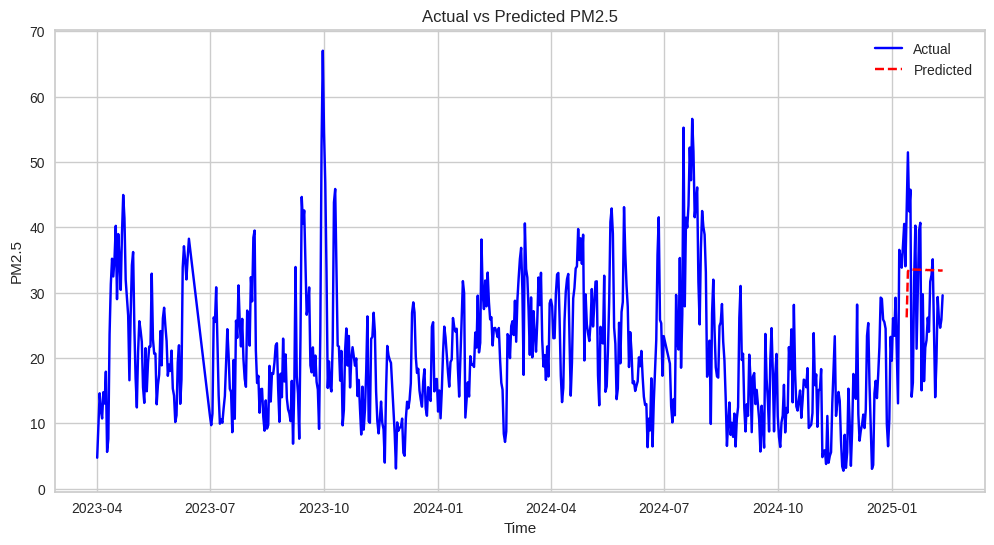

In [38]:
import matplotlib.pyplot as plt

# ทำนายอนาคต
future_dates = df.index[-30:]  # 30 วันสุดท้ายของข้อมูลจริง
preds = predict_model(best_model, fh=30)  # ทำนาย 30 วัน

# พล็อตกราฟ
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pm_2_5'], label='Actual', color='blue')
plt.plot(future_dates, preds, label='Predicted', color='red', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.legend()
plt.show()


In [181]:
save_model(best_model, "best_pm25_model")

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 AutoARIMA(random_state=123,
                                                                           sp=7,
                                                                           suppress_warnings=True))]))]),
 'best_pm25_model.pkl')

In [186]:
loaded_model = load_model("best_pm25_model")

Transformation Pipeline and Model Successfully Loaded


In [2]:
# 1. ทำนายผลด้วยโมเดลที่โหลดมา

# 2. สร้างและประเมินโมเดลขั้นสุดท้าย
final_model = finalize_model(best_model)

# 3. ลบแถวที่มีค่า NaN ใน df
df = df.dropna()

# 4. สำเนาข้อมูลเพื่อเตรียม exogenous variables
original_data = df.copy()

# 5. เตรียมข้อมูล exogenous variables สำหรับการทำนาย
last_date = original_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=1, freq='D')

# 6. สร้าง DataFrame สำหรับ exogenous variables
X_pred = pd.DataFrame(index=future_dates)

# 7. คัดลอกค่า exogenous variables จากข้อมูลเดิม (ใช้ค่าล่าสุด)
for col in original_data.columns:
    if col not in ['pm_2_5']:  # ไม่รวมคอลัมน์ที่ไม่ต้องการ
        if col != 'pm_2_5':  # ไม่รวม target variable
            X_pred[col] = original_data[col].iloc[-1]

# 8. เปรียบเทียบค่าจริงกับค่าที่พยากรณ์ได้
result_df = test_df.copy()
result_df["Predicted"] = predictions["y_pred"].values
print(result_df)
predictions = predict_model(final_model, X=X_pred)

# predictions = predict_model(loaded_model, fh=len(test_df), X=test_df)

NameError: name 'best_model' is not defined

In [ ]:
import pandas as pd
from pycaret.time_series import *

# โหลดข้อมูล
data = pd.read_csv('data_eng_day.csv')
print(data)

# แปลง timestamp เป็น datetime และตั้งเป็น index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# 🔹 กำหนด freq (ถ้ายังไม่มี)
data = data.asfreq(pd.infer_freq(data.index))

# 🔹 ใช้ Interpolation เพื่อเติมค่า NaN ใน target
data['pm_2_5'] = data['pm_2_5'].interpolate(method='linear')

# 🔹 แทนที่ค่า NaN ด้วยค่าที่ใกล้ที่สุด (ใช้ค่าเฉลี่ยของ ffill และ bfill)
data = data.ffill().bfill()


# ตั้งค่า target
print(data)
target = 'pm_2_5'

# เรียก setup() พร้อมกับการเติมค่า NaN ใน exogenous variables
setup(data, target=target, session_id=123, fold_strategy='expanding', 
      numeric_imputation_exogenous='mean')  # เติมค่า NaN ด้วยค่าเฉลี่ย

# เปรียบเทียบโมเดล
best_model = compare_models()


     Unnamed: 0            timestamp      timezone   humidity      pm_10  \
0             0  2023-04-01 07:00:00  Asia/Bangkok  73.861694   4.727273   
1             1  2023-04-03 07:00:00  Asia/Bangkok  67.872493  16.046366   
2             2  2023-04-04 07:00:00  Asia/Bangkok  62.995952  13.300139   
3             3  2023-04-05 07:00:00  Asia/Bangkok  59.482051  11.864336   
4             4  2023-04-06 07:00:00  Asia/Bangkok  66.493574  16.405837   
..          ...                  ...           ...        ...        ...   
658         658  2025-02-08 07:00:00  Asia/Bangkok  69.348548  30.654249   
659         659  2025-02-09 07:00:00  Asia/Bangkok  69.916384  28.971065   
660         660  2025-02-10 07:00:00  Asia/Bangkok  71.226336  30.652667   
661         661  2025-02-11 07:00:00  Asia/Bangkok  68.159624  32.532955   
662         662  2025-02-11 11:15:42  Asia/Bangkok  76.329751  33.787755   

        pm_2_5  pm_2_5_sp  temperature  
0     4.727273   4.727273    30.189449  
1    

In [17]:
# สร้างโมเดล
model = create_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:47:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# ทดสอบโมเดล
predictions = predict_model(model)

In [ ]:
# บันทึกโมเดล
save_model(model, 'time_series_pm2_5_model')

In [ ]:
# โหลดโมเดล
loaded_model = load_model('time_series_pm2_5_model')
import pandas as pd
from pycaret.time_series import *

# โหลดข้อมูล
data = pd.read_csv('data_eng_day.csv')

# แปลงคอลัมน์ timestamp เป็น datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# ตั้งค่า index เป็น timestamp
data.set_index('timestamp', inplace=True)

# ตั้งค่า target และ features
target = 'pm_2_5'
features = ['humidity', 'pm_10', 'temperature']

# เตรียมข้อมูลสำหรับ Time Series Forecasting
setup = setup(data, target=target, session_id=123, fold_strategy='timeseries', numeric_features=features)

# เปรียบเทียบโมเดล
best_model = compare_models()

# สร้างโมเดล
model = create_model(best_model)

# ทดสอบโมเดล
predictions = predict_model(model)

# บันทึกโมเดล
save_model(model, 'time_series_pm2_5_model')